In [12]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import math

In [4]:
url = 'https://raw.githubusercontent.com/ee2110/Machine_Learning_Mathematics/master/Multi-Armed_Bandit/dataset_sample/Ads_Optimisation.csv'
dataset = pd.read_csv(url)
dataset

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,0,0,1,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,1,0,0


## **Random Selection**

In [33]:
N = 10000
d = 10
ads_selected = []
total_reward = 0
for n in range(0, N):
    # random choose ads
    ad = random.randrange(d)
    # store selected ads
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    total_reward = total_reward + reward

In [34]:
total_reward

1226

In [35]:
# value_counts() method returns an object containing counts of unique values in sorted order.
arm_count = pd.Series(ads_selected).value_counts(normalize = True)
arm_count

1    0.1019
5    0.1015
9    0.1007
3    0.1005
4    0.1003
7    0.1002
8    0.0993
6    0.0992
2    0.0983
0    0.0981
dtype: float64

In [36]:
def plot_select_count(ads_selected_count):
  x = np.arange(10)
  sns.displot(ads_selected_count, kde=True)
  plt.xticks(x)
  plt.ioff()

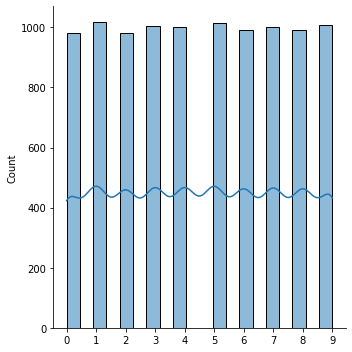

In [37]:
plot_select_count(ads_selected)

## **Epsilon-Greedy Policy**

In [52]:
N = 10000
d = 10
ads_selected = []
numbers_of_selections = [0] * d
sums_of_reward = [0] * d
total_reward = [0] * d
epsilon = 0.5

In [53]:
for n in range(0, N):
  if np.random.random() < epsilon:
    ad = random.randrange(d)
  else:
    ad = np.argmax(sums_of_reward)
  reward = dataset.values[n, ad]
  numbers_of_selections[ad] += 1
  total_reward[ad]+= reward
  sums_of_reward[ad] = total_reward[ad]/numbers_of_selections[ad]
  # store selected ads
  ads_selected.append(ad)

In [54]:
total_reward

[83, 65, 36, 67, 1401, 5, 46, 158, 38, 20]

In [55]:
pd.Series(ads_selected).value_counts(normalize = True)

4    0.5186
7    0.0773
8    0.0547
0    0.0537
3    0.0528
2    0.0519
5    0.0513
1    0.0482
6    0.0465
9    0.0450
dtype: float64

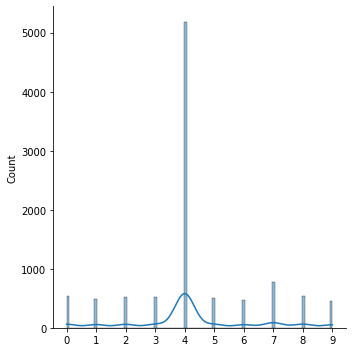

In [56]:
plot_select_count(ads_selected)

## **Upper Confidence Bound**

In [38]:
# Implementing UCB
N = 10000
d = 10
ads_selected = []
numbers_of_selections = [0] * d
sums_of_reward = [0] * d
total_reward = 0

In [39]:
for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0, d):
        if (numbers_of_selections[i] > 0):
            average_reward = sums_of_reward[i] / numbers_of_selections[i]
            delta_i = math.sqrt(2 * math.log(n+1) / numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    numbers_of_selections[ad] += 1
    reward = dataset.values[n, ad]
    sums_of_reward[ad] += reward
    total_reward += reward

In [40]:
total_reward

2125

In [42]:
pd.Series(ads_selected).value_counts(normalize = True)

4    0.5630
7    0.1106
0    0.0947
6    0.0435
1    0.0417
3    0.0380
8    0.0352
2    0.0338
9    0.0215
5    0.0180
dtype: float64

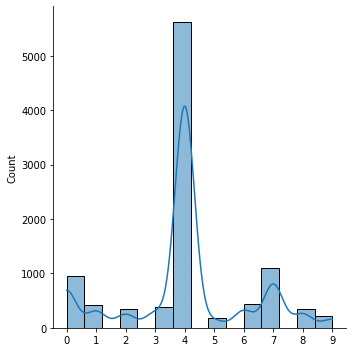

In [43]:
plot_select_count(ads_selected)